In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections
import networkx as nx
import functools
import operator
%matplotlib inline 

In [2]:
missing_values=['N','0000-00-00']

In [3]:
people=pd.read_csv('./neurotree/people.tsv', sep='\t', encoding='utf-8',  escapechar='\\', 
                   na_values = missing_values)
connect=pd.read_csv('./neurotree/connect.tsv', sep='\t', encoding='latin-1',  escapechar='\\', 
                    na_values = missing_values)

/home/dhananjay/genealogy/.env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
connect_remove=connect[~(connect['pid2']==0)].copy()
connect_remove['startdate'].fillna('0000', inplace=True)
connect_remove['stopdate'].fillna('0000', inplace=True)

In [5]:
date_att=['startdate','stopdate']
connect_remove[date_att]=connect_remove[date_att].applymap(lambda x : int(x.split('-')[0].strip()) if len(x) > 1 else x)

In [12]:
people1=people[people['majorarea'].str.contains('computerscience')]
pid=people1['pid']
conn=connect_remove[(connect_remove['pid1'].isin(pid.values))|(connect_remove['pid2'].isin(pid.values))]
con_uni_pid=pd.unique(conn[['pid1', 'pid2']].values.ravel('K'))
people_mod=people[people['pid'].isin(con_uni_pid)].copy()

In [79]:
def fecundity_value(pid, connection, time=10):
    temp=connection[connection['pid2']==pid].sort_values(by=['startdate', 'stopdate'])
    tmp_list=list(filter(lambda a: a != 0, temp['startdate'].values))
    if len(tmp_list) > 0:
        min_year=min(tmp_list)
        max_year=min_year+time
        fecun=len(temp[(temp['startdate'] >= min_year) & (temp['startdate'] <=max_year)])
    else:
        fecun=0
    #print(pid, fecun)
    return fecun

In [8]:
fecun_val=[]
for pid in people_mod['pid'].values:
    fecun_val.append(fecundity_value(pid, conn))

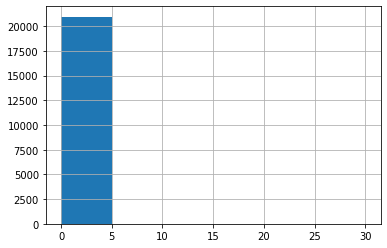

In [56]:
pndas=pd.DataFrame(fecun_val, columns=['pid', 'fecun'])
pndas['fecun'].hist(bins=[0,5,10,15,20,25,30])

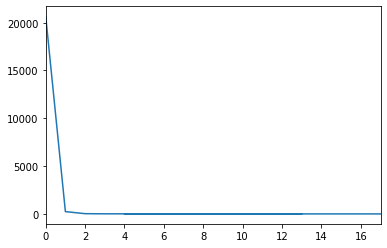

In [71]:
pndas['fecun'].value_counts().plot()

In [10]:
def fecun2(pid, connection):
    temp=connection[connection['pid2']==pid].sort_values(by=['startdate', 'stopdate'])
    fecun=len(temp)
    return fecun

In [ ]:
fecun3 = functools.partial(fecun2,connection=conn[['pid1','pid2','startdate','stopdate']])
people_mod['fecun']=people_mod['pid'].apply(fecun3)

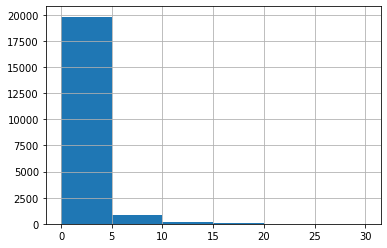

In [58]:
people_mod['fecun'].hist(bins=[0,5,10,15,20,25,30])

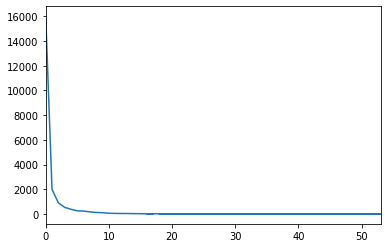

In [73]:
people_mod['fecun'].value_counts().plot()

In [19]:
people_mod.locid=people_mod.locid.astype(int)

In [1]:
#people_mod.head(10)

In [38]:
temp=people_mod.groupby(['locid','location'])['fecun'].sum().reset_index()

In [40]:
temp.head()

,locid,location,fecun
0,3,ETH Zürich,1
1,12,Arizona State University,109
2,18,Bar-Ilan University,1
3,27,Boston University,92
4,29,Brandeis University,28


In [49]:
temp.sort_values(by=['fecun'],ascending=False).head(10)

,locid,location,fecun
58,312,"University of California, Berkeley",479
156,995,Georgia Institute of Technology,474
88,388,"University of Illinois, Urbana-Champaign",395
8,38,Carnegie Mellon University,391
51,277,Stanford University,371
61,315,"University of California, Los Angeles",363
92,398,"University of Maryland, College Park",316
202,1938,Capella University,300
251,3762,North Carolina State University,297
94,405,"University of Michigan, Ann Arbor",286


In [ ]:
fecun4 = functools.partial(fecun2,connection=connect_remove[['pid1','pid2','startdate','stopdate']])
people_mod['fecun1']=people_mod['pid'].apply(fecun3)

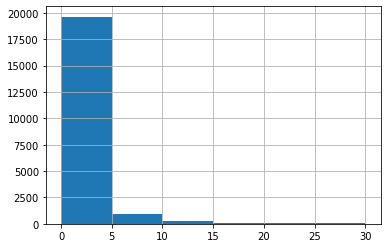

In [57]:
people_mod['fecun1'].hist(bins=[0,5,10,15,20,25,30])

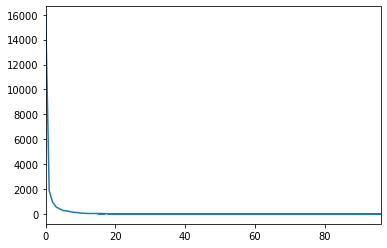

In [70]:
people_mod['fecun1'].value_counts().plot()

In [59]:
mod_connect_remove=connect_remove[connect_remove['startdate']!=0].copy()

In [60]:
con_uni_pid1=pd.unique(mod_connect_remove[['pid1', 'pid2']].values.ravel('K'))
mod_people=people[people['pid'].isin(con_uni_pid1)].copy()

In [61]:
mod_fecun_val=[]
for pid in mod_people['pid'].values:
    mod_fecun_val.append(fecundity_value(pid, mod_connect_remove))

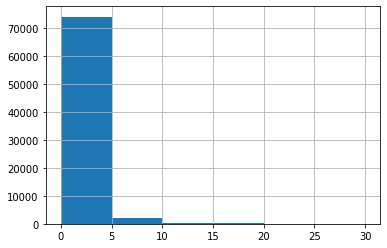

In [64]:
pndas1=pd.DataFrame(mod_fecun_val, columns=['pid', 'fecun'])
pndas1['fecun'].hist(bins=[0,5,10,15,20,25,30])

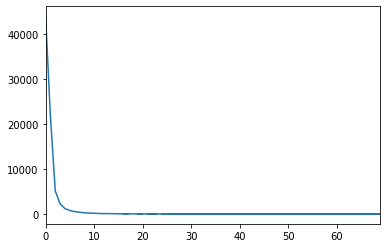

In [69]:
pndas1['fecun'].value_counts().plot()

In [74]:
pndas1['fecun'].describe()

count    76890.000000
mean         0.852959
std          1.863334
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         69.000000
Name: fecun, dtype: float64

In [80]:
%%time
fecun5 = functools.partial(fecundity_value,connection=mod_connect_remove[['pid1','pid2','startdate','stopdate']],time=30)
mod_people['fecun20']=mod_people['pid'].apply(fecun5)

CPU times: user 2min 28s, sys: 29.6 ms, total: 2min 28s
Wall time: 2min 28s


In [85]:
mod_people[mod_people['fecun20']!=0]['fecun20'].describe()

count    32919.000000
mean         2.393906
std          3.587548
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        175.000000
Name: fecun20, dtype: float64

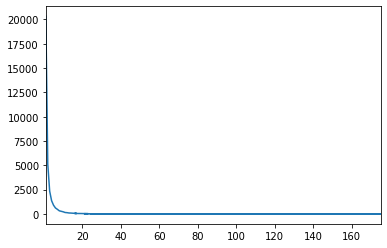

In [87]:
mod_people[mod_people['fecun20']!=0]['fecun20'].value_counts().plot()